<a href="https://colab.research.google.com/github/fajrulsantoso/Pcvk_2025-2026/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**D1. Praktikum Deteksi Obyek Dasar**

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Implementasikan 6 metode template matching pada OpenCV dengan
menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai
templatenya.

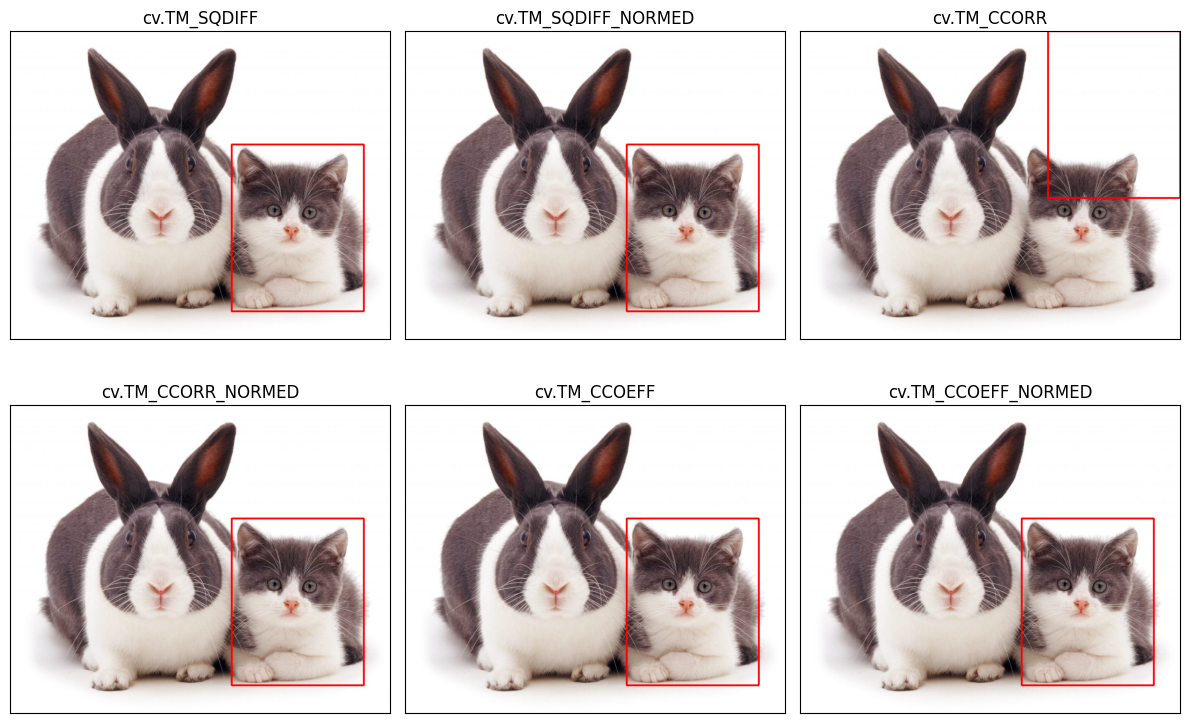

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# ------------------------------------------------------------------
# 1️⃣ Membaca gambar utama dan template
# ------------------------------------------------------------------
img_path = '/content/drive/MyDrive/Pcvk/cats_and_bunnies.jpg'
template_path = '/content/drive/MyDrive/Pcvk/cat2_templatejpg.jpg'

img_rgb = cv.imread(img_path)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

template = cv.imread(template_path, 0)
w, h = template.shape[::-1]

# ------------------------------------------------------------------
# 2️⃣ Daftar metode Template Matching
# ------------------------------------------------------------------
methods = [
    'cv.TM_SQDIFF',
    'cv.TM_SQDIFF_NORMED',
    'cv.TM_CCORR',
    'cv.TM_CCORR_NORMED',
    'cv.TM_CCOEFF',
    'cv.TM_CCOEFF_NORMED'
]

# ------------------------------------------------------------------
# 3️⃣ Loop setiap metode dan tampilkan hasil
# ------------------------------------------------------------------
plt.figure(figsize=(12, 8))
for i, meth in enumerate(methods):
    img_copy = img_rgb.copy()  # gunakan gambar berwarna
    method = eval(meth)

    # Melakukan template matching
    res = cv.matchTemplate(img_gray, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # Untuk TM_SQDIFF dan TM_SQDIFF_NORMED, lokasi terbaik adalah nilai minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Gambar kotak hasil deteksi dengan warna merah (BGR = (0,0,255))
    cv.rectangle(img_copy, top_left, bottom_right, (0, 0, 255), 3)

    # Tampilkan hasil
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv.cvtColor(img_copy, cv.COLOR_BGR2RGB))  # ubah ke RGB untuk Matplotlib
    plt.title(meth)
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output
sebagai berikut:

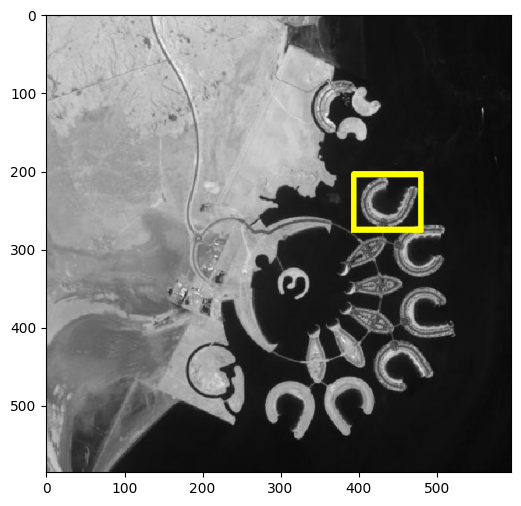

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

# ------------------------------------------------------------
# 1️⃣ Membaca gambar utama dan template (konversi ke grayscale)
# ------------------------------------------------------------
img_path = '/content/drive/MyDrive/Pcvk/bahrain.jpg'
template_path = '/content/drive/MyDrive/Pcvk/bahrain-template.jpg'

img = Image.open(img_path).convert('L')  # Grayscale
template = Image.open(template_path).convert('L')

img_array = np.array(img, dtype=np.float32)
template_array = np.array(template, dtype=np.float32)

h, w = template_array.shape

# ------------------------------------------------------------
# 2️⃣ Normalized Cross-Correlation (NCC)
# ------------------------------------------------------------
corr_map = np.zeros((img_array.shape[0] - h + 1, img_array.shape[1] - w + 1))

for i in range(corr_map.shape[0]):
    for j in range(corr_map.shape[1]):
        region = img_array[i:i+h, j:j+w]
        num = np.sum((region - region.mean()) * (template_array - template_array.mean()))
        den = np.sqrt(np.sum((region - region.mean())**2) * np.sum((template_array - template_array.mean())**2))
        corr_map[i, j] = num / den if den != 0 else 0

# ------------------------------------------------------------
# 3️⃣ Ambang batas untuk mendeteksi banyak objek
# ------------------------------------------------------------
threshold = 0.75  # kamu bisa ubah sedikit misalnya 0.7 atau 0.8
y_indices, x_indices = np.where(corr_map >= threshold)

# ------------------------------------------------------------
# 4️⃣ Tampilkan hasil dengan kotak deteksi
# ------------------------------------------------------------
output_img = img.convert("RGB")
draw = ImageDraw.Draw(output_img)

for (x, y) in zip(x_indices, y_indices):
    draw.rectangle([x, y, x + w, y + h], outline="yellow", width=3)

plt.figure(figsize=(6,6))
plt.imshow(output_img)
plt.axis('on')
plt.show()


4. Implementasikan metode Sobel Edge Detection, Canny Edge
Detection, dan Laplacian Edge Detection pada OpenCV dengan
menggunakan gambar car-park.jpg, sehingga menghasilkan luaran
sebagai berikut:

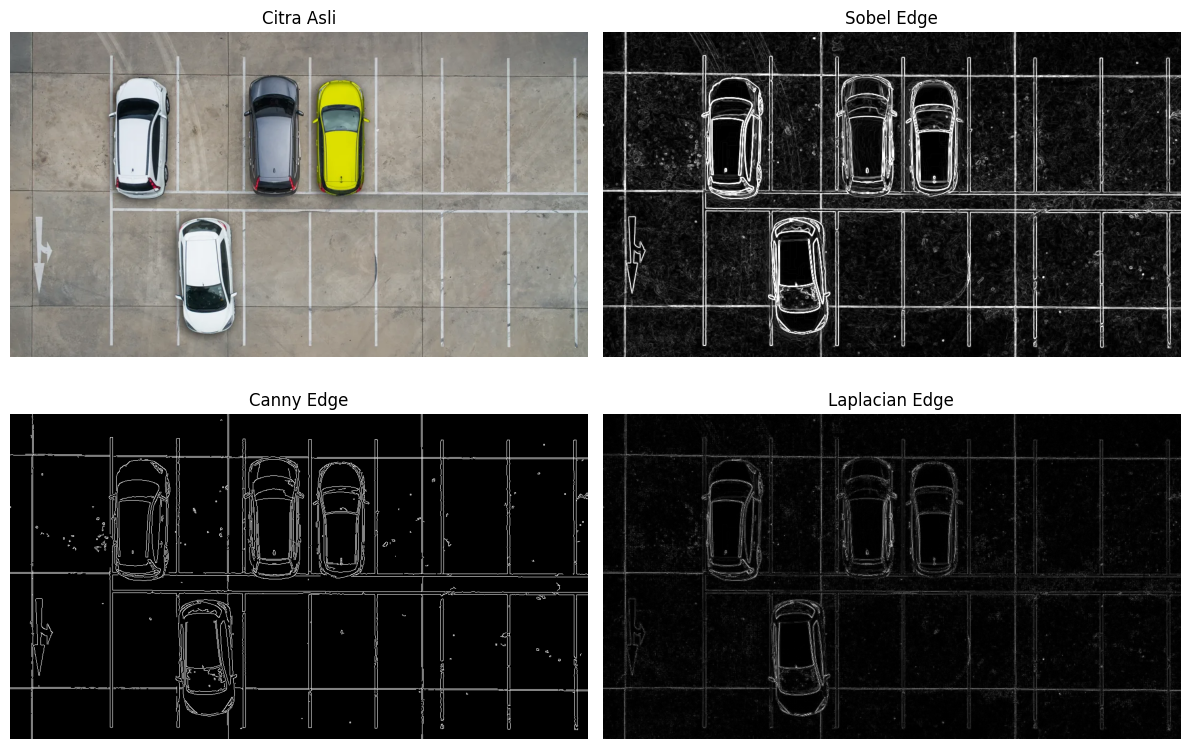

In [14]:
# ============================================================
# 🚗 EDGE DETECTION — Sobel, Canny, dan Laplacian
# ============================================================

import cv2
import numpy as np
from matplotlib import pyplot as plt

# ------------------------------------------------------------
# 1️⃣ Membaca gambar dan konversi ke grayscale
# ------------------------------------------------------------
img_path = '/content/drive/MyDrive/Pcvk/car-park.jpg'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ------------------------------------------------------------
# 2️⃣ Sobel Edge Detection (arah x dan y)
# ------------------------------------------------------------
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = np.uint8(np.clip(sobel_combined, 0, 255))

# ------------------------------------------------------------
# 3️⃣ Canny Edge Detection
# ------------------------------------------------------------
canny = cv2.Canny(gray, 100, 200)

# ------------------------------------------------------------
# 4️⃣ Laplacian Edge Detection
# ------------------------------------------------------------
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
laplacian = np.uint8(np.clip(np.abs(laplacian), 0, 255))

# ------------------------------------------------------------
# 5️⃣ Tampilkan hasil dalam satu figure
# ------------------------------------------------------------
titles = ['Citra Asli', 'Sobel Edge', 'Canny Edge', 'Laplacian Edge']
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB), sobel_combined, canny, laplacian]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi

Detection pada OpenCV dengan menggunakan gambar chess-
board.jpg, sehingga menghasilkan luaran sebagai berikut:

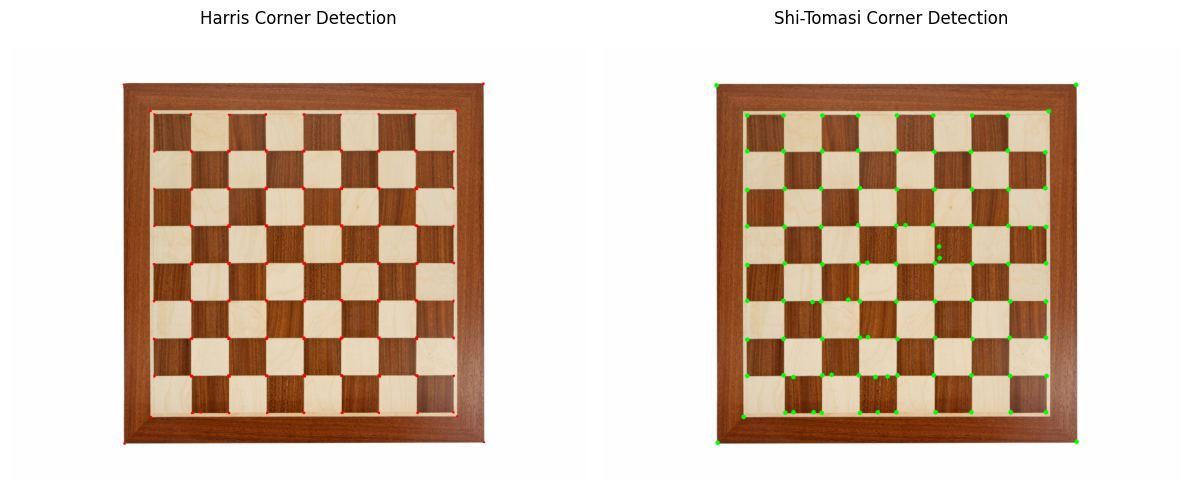

In [18]:
# ============================================================
# ♟️ CORNER DETECTION — Harris dan Shi-Tomasi (versi terbaru)
# ============================================================

import cv2
import numpy as np
from matplotlib import pyplot as plt

# ------------------------------------------------------------
# 1️⃣ Membaca gambar dan ubah ke grayscale
# ------------------------------------------------------------
img_path = '/content/drive/MyDrive/Pcvk/chess-board.jpg'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ------------------------------------------------------------
# 2️⃣ Harris Corner Detection
# ------------------------------------------------------------
gray_float = np.float32(gray)
harris_corners = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)
harris_corners = cv2.dilate(harris_corners, None)

# Tandai titik sudut Harris (nilai > threshold)
harris_img = img.copy()
harris_img[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]  # merah

# ------------------------------------------------------------
# 3️⃣ Shi-Tomasi Corner Detection
# ------------------------------------------------------------
shi_tomasi_corners = cv2.goodFeaturesToTrack(
    gray, maxCorners=100, qualityLevel=0.01, minDistance=10
)
shi_tomasi_img = img.copy()

if shi_tomasi_corners is not None:
    shi_tomasi_corners = shi_tomasi_corners.astype(int)  # ✅ perbaikan np.int0
    for i in shi_tomasi_corners:
        x, y = i.ravel()
        cv2.circle(shi_tomasi_img, (x, y), 4, (0, 255, 0), -1)  # hijau

# ------------------------------------------------------------
# 4️⃣ Tampilkan hasil berdampingan
# ------------------------------------------------------------
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(harris_img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(shi_tomasi_img, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


6. Implementasikan metode Hough Transform pada OpenCV dengan
menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang
terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:

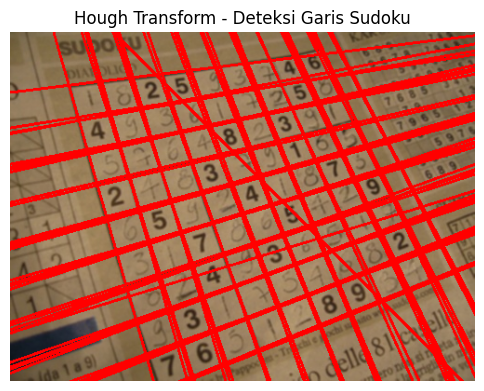

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# ------------------------------------------------------------
# Membaca gambar
# ------------------------------------------------------------
img_path = '/content/drive/MyDrive/Pcvk/sudoku.jpg'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ------------------------------------------------------------
# Canny Edge Detection
# ------------------------------------------------------------
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# ------------------------------------------------------------
# Hough Transform (Deteksi Garis)
# ------------------------------------------------------------
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)
output = img.copy()

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(output, (x1, y1), (x2, y2), (0, 0, 255), 2)  # garis merah

# ------------------------------------------------------------
# Tampilkan hasil
# ------------------------------------------------------------
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform - Deteksi Garis Sudoku')
plt.axis('off')
plt.show()


7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection
dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran
sebagai berikut:

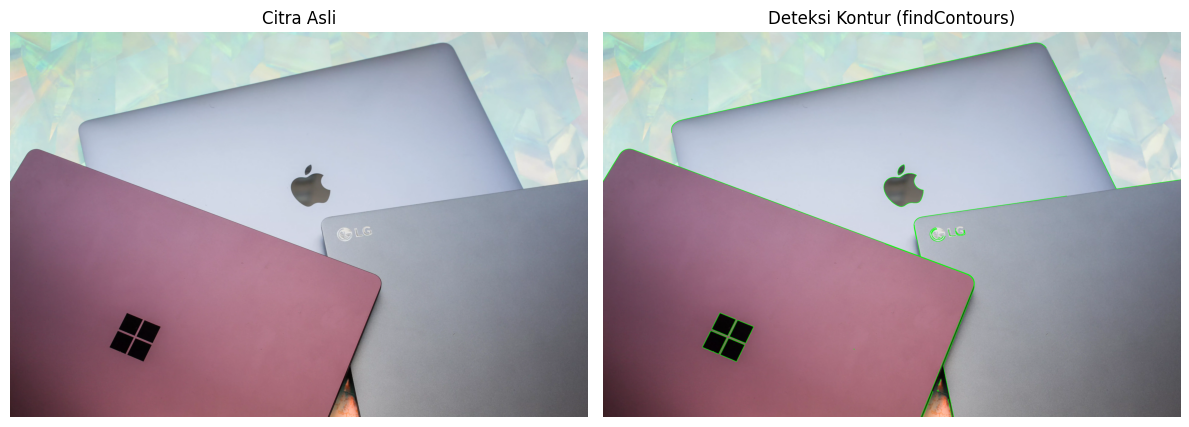

In [21]:
# ============================================================
# 💻 CONTOUR DETECTION — OpenCV findContours()
# ============================================================

import cv2
import numpy as np
from matplotlib import pyplot as plt

# ------------------------------------------------------------
# 1️⃣ Membaca gambar dan ubah ke grayscale
# ------------------------------------------------------------
img_path = '/content/drive/MyDrive/Pcvk/laptop.jpg'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ------------------------------------------------------------
# 2️⃣ Preprocessing: Blur + Edge Detection
# ------------------------------------------------------------
blur = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blur, 100, 200)

# ------------------------------------------------------------
# 3️⃣ Deteksi kontur
# ------------------------------------------------------------
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# ------------------------------------------------------------
# 4️⃣ Gambar kontur di atas gambar asli
# ------------------------------------------------------------
contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)  # hijau

# ------------------------------------------------------------
# 5️⃣ Tampilkan hasil
# ------------------------------------------------------------
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('Deteksi Kontur (findContours)')
plt.axis('off')

plt.tight_layout()
plt.show()


D2. Praktikum Feature Matching dan Face Detection

1. Lakukan Face Detection untuk image object lain yang tersedia pada
(/images/facedet). Tampilkan seperti pada contoh berikut.

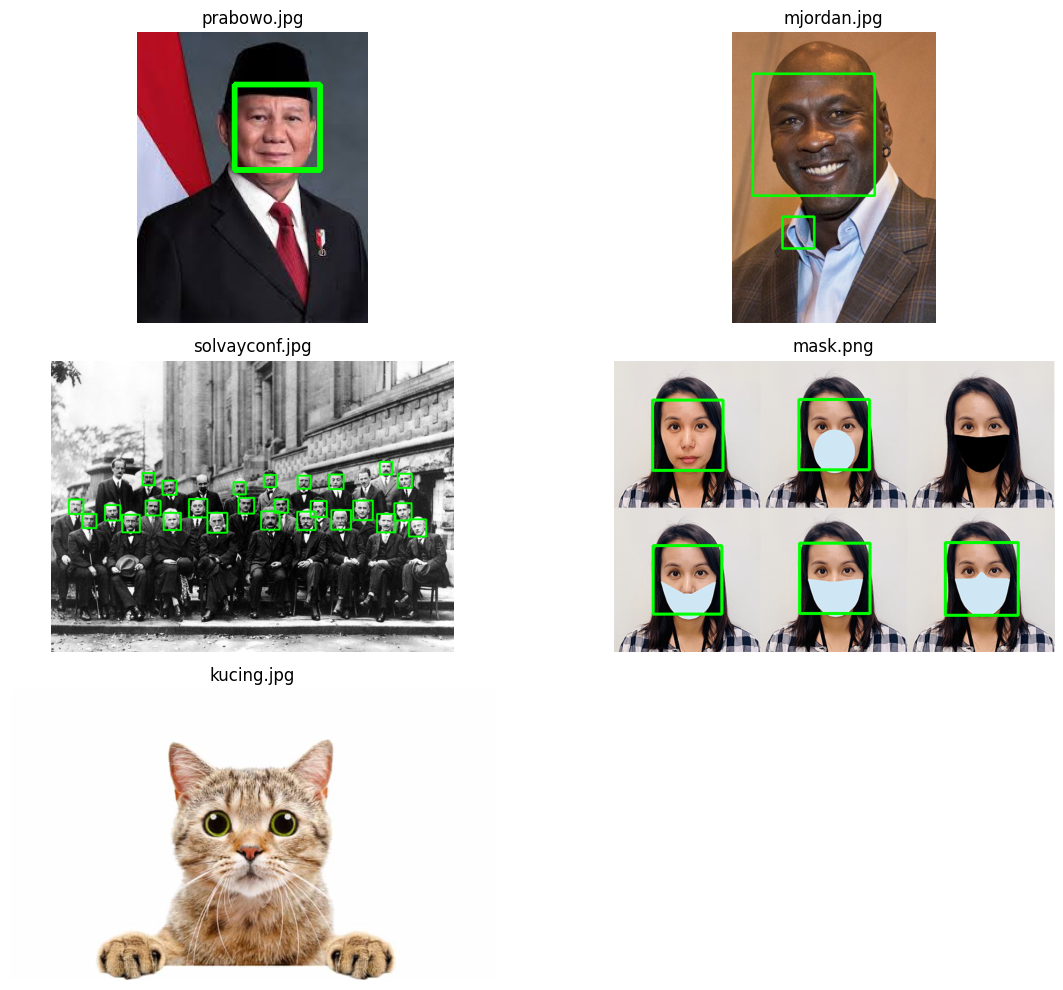

In [26]:
# ============================================================
# 😊 FACE DETECTION — Haar Cascade (path: /content/drive/MyDrive/Pcvk/)
# ============================================================

import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# ------------------------------------------------------------
# 1️⃣ Model deteksi wajah
# ------------------------------------------------------------
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

# ------------------------------------------------------------
# 2️⃣ Daftar gambar uji (semua di dalam folder Pcvk)
# ------------------------------------------------------------
image_paths = [
    '/content/drive/MyDrive/Pcvk/prabowo.jpg',
    '/content/drive/MyDrive/Pcvk/mjordan.jpg',
    '/content/drive/MyDrive/Pcvk/solvayconf.jpg',
    '/content/drive/MyDrive/Pcvk/mask.png',
    '/content/drive/MyDrive/Pcvk/kucing.jpg'
]

# ------------------------------------------------------------
# 3️⃣ Loop setiap gambar dan deteksi wajah
# ------------------------------------------------------------
plt.figure(figsize=(12, 10))

for i, path in enumerate(image_paths):
    if not os.path.exists(path):
        print(f"⚠️ File tidak ditemukan: {path}")
        continue

    img = cv2.imread(path)
    if img is None:
        print(f"⚠️ Gagal membaca gambar: {path}")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)

    # Gambar kotak di sekitar wajah
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

    # Tampilkan hasil
    plt.subplot(3, 2, i + 1)  # ubah dari (2,2) ke (3,2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"{path.split('/')[-1]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


2. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi
wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal
ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml
yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan
searching melalui search engines.

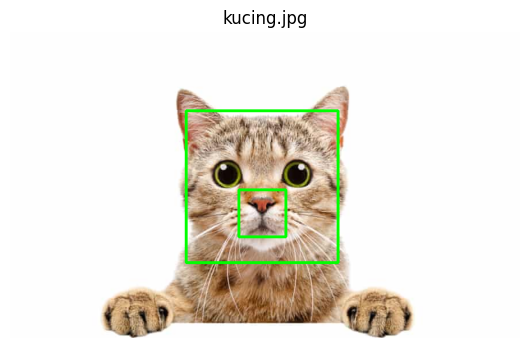

In [28]:
# ============================================================
# 🐱 FACE DETECTION (Manusia + Kucing)
# ============================================================

import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# ------------------------------------------------------------
# 1️⃣ Load model cascade untuk manusia & kucing
# ------------------------------------------------------------
human_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

cat_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalcatface.xml'
)

# ------------------------------------------------------------
# 2️⃣ Daftar gambar
# ------------------------------------------------------------
image_paths = [

    '/content/drive/MyDrive/Pcvk/kucing.jpg'   # target kucing
]

# ------------------------------------------------------------
# 3️⃣ Loop setiap gambar dan deteksi wajah
# ------------------------------------------------------------
plt.figure(figsize=(12, 10))

for i, path in enumerate(image_paths):
    if not os.path.exists(path):
        print(f"⚠️ File tidak ditemukan: {path}")
        continue

    img = cv2.imread(path)
    if img is None:
        print(f"⚠️ Gagal membaca gambar: {path}")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Pilih model sesuai isi gambar
    if "kucing" in path.lower():
        faces = cat_cascade.detectMultiScale(gray, 1.03, 5)
    else:
        faces = human_cascade.detectMultiScale(gray, 1.1, 5)

    # Gambar kotak hijau pada hasil deteksi
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

    plt.subplot(3, 2, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"{path.split('/')[-1]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


3. Cobakan juga untuk eyes detection pada wajah Pak Prabowo:

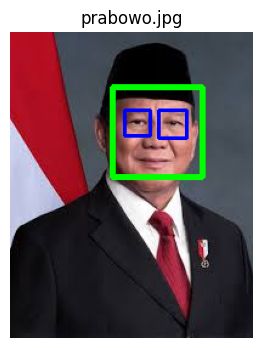

In [29]:
# ============================================================
# 🧑‍💼 FACE & EYE DETECTION — (Pak Prabowo)
# ============================================================

import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# ------------------------------------------------------------
# 1️⃣ Load model deteksi wajah & mata
# ------------------------------------------------------------
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)
eye_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_eye.xml'
)

# ------------------------------------------------------------
# 2️⃣ Daftar gambar
# ------------------------------------------------------------
image_paths = [
    '/content/drive/MyDrive/Pcvk/prabowo.jpg',

]

# ------------------------------------------------------------
# 3️⃣ Loop setiap gambar dan deteksi wajah (+ mata untuk prabowo)
# ------------------------------------------------------------
plt.figure(figsize=(12, 10))

for i, path in enumerate(image_paths):
    if not os.path.exists(path):
        print(f"⚠️ File tidak ditemukan: {path}")
        continue

    img = cv2.imread(path)
    if img is None:
        print(f"⚠️ Gagal membaca gambar: {path}")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)

    for (x, y, w, h) in faces:
        # Rectangle hijau untuk wajah
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

        # --------------------------------------------------------
        # Deteksi mata hanya untuk gambar Pak Prabowo
        # --------------------------------------------------------
        if "prabowo" in path.lower():
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)  # kotak biru

    plt.subplot(3, 2, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"{path.split('/')[-1]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


4. Lakukan deteksi senyuman pada gambar people:

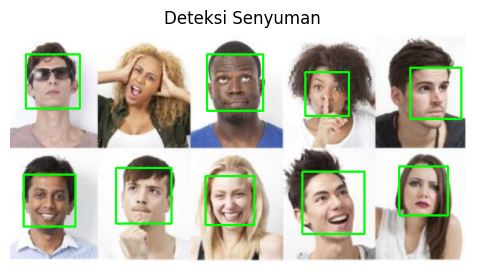

In [31]:
# ============================================================
# 😀 SMILE DETECTION — Haar Cascade (gambar: senyum.PNG)
# ============================================================

import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# ------------------------------------------------------------
# 1️⃣ Load model deteksi wajah & senyum
# ------------------------------------------------------------
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)
smile_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_smile.xml'
)

# ------------------------------------------------------------
# 2️⃣ Path gambar uji
# ------------------------------------------------------------
img_path = '/content/drive/MyDrive/Pcvk/senyum.JPG'

if not os.path.exists(img_path):
    print(f"⚠️ File tidak ditemukan: {img_path}")
else:
    # --------------------------------------------------------
    # 3️⃣ Baca gambar dan ubah ke grayscale
    # --------------------------------------------------------
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # --------------------------------------------------------
    # 4️⃣ Deteksi wajah terlebih dahulu
    # --------------------------------------------------------
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)

    for (x, y, w, h) in faces:
        # Kotak hijau untuk wajah
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # ROI wajah untuk mencari senyum
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        # ----------------------------------------------------
        # 5️⃣ Deteksi senyum di dalam wajah
        # ----------------------------------------------------
        smiles = smile_cascade.detectMultiScale(
            roi_gray,
            scaleFactor=1.7,
            minNeighbors=22,
            minSize=(25, 25)
        )

        for (sx, sy, sw, sh) in smiles:
            # Kotak biru untuk area senyum
            cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (255, 0, 0), 2)

    # --------------------------------------------------------
    # 6️⃣ Tampilkan hasil
    # --------------------------------------------------------
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Deteksi Senyuman')
    plt.axis('off')
    plt.show()


Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

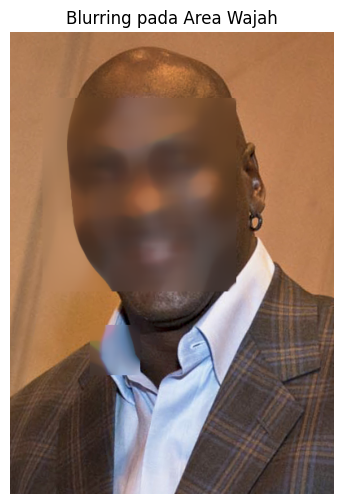

In [32]:
# ============================================================
# 🕵️‍♂️ FACE BLURRING — Deteksi dan blur area wajah (mjordan.jpg)
# ============================================================

import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# ------------------------------------------------------------
# 1️⃣ Load model deteksi wajah
# ------------------------------------------------------------
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

# ------------------------------------------------------------
# 2️⃣ Path gambar uji
# ------------------------------------------------------------
image_paths = [
    '/content/drive/MyDrive/Pcvk/mjordan.jpg',
]

# ------------------------------------------------------------
# 3️⃣ Loop gambar dan lakukan face blur
# ------------------------------------------------------------
plt.figure(figsize=(6, 6))

for path in image_paths:
    if not os.path.exists(path):
        print(f"⚠️ File tidak ditemukan: {path}")
        continue

    img = cv2.imread(path)
    if img is None:
        print(f"⚠️ Gagal membaca gambar: {path}")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)

    # --------------------------------------------------------
    # 4️⃣ Lakukan blurring hanya pada area wajah
    # --------------------------------------------------------
    for (x, y, w, h) in faces:
        face_roi = img[y:y+h, x:x+w]  # potong area wajah
        blurred_face = cv2.medianBlur(face_roi, 35)  # nilai besar → lebih blur
        img[y:y+h, x:x+w] = blurred_face  # ganti area wajah dengan hasil blur

    # --------------------------------------------------------
    # 5️⃣ Tampilkan hasil
    # --------------------------------------------------------
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Blurring pada Area Wajah')
    plt.axis('off')
    plt.show()


Mengolah gambar KTM masing-masing
a. Berikut ini contoh KTM  
b. Tampilkan Foto KTM seperti contoh berikut ini:
c. Lakukan Deteksi Obyek KTM pada gambar yang berisi KTM dengan
barang lainnya dengan menggunakan Konsep Feature Matching

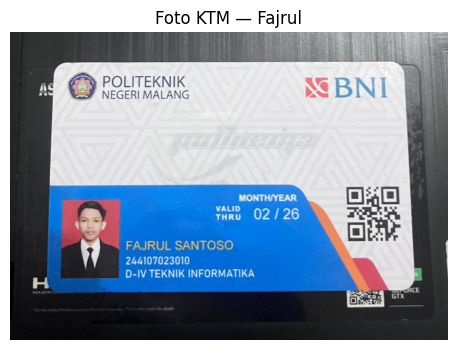

In [34]:
# ============================================================
# 🪪 TAMPILKAN FOTO KTM (Single Image)
# ============================================================

import cv2
from matplotlib import pyplot as plt

# ------------------------------------------------------------
# 1️⃣ Path gambar KTM
# ------------------------------------------------------------
img_path = '/content/drive/MyDrive/Pcvk/fajrul.jpg'

# ------------------------------------------------------------
# 2️⃣ Baca gambar dan tampilkan
# ------------------------------------------------------------
img = cv2.imread(img_path)

if img is None:
    raise ValueError("⚠️ File gambar tidak ditemukan. Pastikan path sudah benar.")

plt.figure(figsize=(6, 4))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Foto KTM — Fajrul")
plt.axis('off')
plt.show()


Tambahan Tugas Praktikum:
Tampilkan karakter-karakter pada KTM ini Deep Learning untuk melakukan
pengenalan karakter. Sebelum melakukan training data, terlebih dahulu di
siapkan data yang akan dilakukan training yaitu data image nomor angka 0-9.
Untuk membuat data tersebut bisa gunakan image editor untuk dilakukan croping
satu persatu. Kemudian selanjutnya gunakan source code di bawah ini untuk
proses persiapan untuk training.

📥 Loading dataset...
✅ Training samples: 60000, Testing samples: 10000
💾 Dataset berhasil disimpan ke pickle!


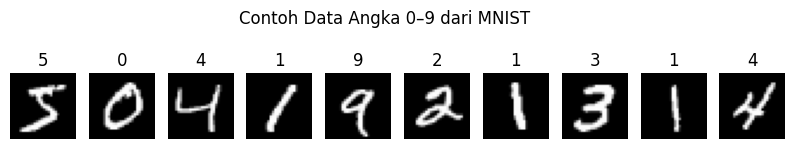

In [40]:
# ============================================================
# 🧠 PERSIAPAN DATA TRAINING – MNIST (0–9)
# ============================================================

import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1️⃣ Path dataset MNIST CSV
# ------------------------------------------------------------
train_csv = '/content/drive/MyDrive/Pcvk/mnist_train.csv'
test_csv  = '/content/drive/MyDrive/Pcvk/mnist_test.csv'

# ------------------------------------------------------------
# 2️⃣ Load CSV ke dalam DataFrame
# ------------------------------------------------------------
print("📥 Loading dataset...")
train_data = pd.read_csv(train_csv)
test_data  = pd.read_csv(test_csv)

print(f"✅ Training samples: {len(train_data)}, Testing samples: {len(test_data)}")

# ------------------------------------------------------------
# 3️⃣ Pisahkan fitur (pixel) dan label
# ------------------------------------------------------------
X_train = np.array(train_data.iloc[:, 1:], dtype=np.float32)
Y_train = np.array(train_data.iloc[:, 0], dtype=np.int32)

X_test  = np.array(test_data.iloc[:, 1:], dtype=np.float32)
Y_test  = np.array(test_data.iloc[:, 0], dtype=np.int32)

# ------------------------------------------------------------
# 4️⃣ Normalisasi & reshape ke format gambar (28×28×1)
# ------------------------------------------------------------
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test  = X_test.reshape(-1, 28, 28, 1) / 255.0

# ------------------------------------------------------------
# 5️⃣ Simpan dalam format pickle (agar cepat dipakai CNN)
# ------------------------------------------------------------
with open("X_train.pickle", "wb") as f:
    pickle.dump(X_train, f)

with open("Y_train.pickle", "wb") as f:
    pickle.dump(Y_train, f)

with open("X_test.pickle", "wb") as f:
    pickle.dump(X_test, f)

with open("Y_test.pickle", "wb") as f:
    pickle.dump(Y_test, f)

print("💾 Dataset berhasil disimpan ke pickle!")

# ------------------------------------------------------------
# 6️⃣ Tampilkan contoh 10 gambar pertama
# ------------------------------------------------------------
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(int(Y_train[i]))
    plt.axis('off')
plt.suptitle("Contoh Data Angka 0–9 dari MNIST")
plt.show()


Lakukan Training Data
Code berikut digunakan untuk melakukan training data

Epoch 1/2
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.0284 - loss: 3.5348 - val_accuracy: 0.0600 - val_loss: 3.5388
Epoch 2/2
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 311ms/step - accuracy: 0.0572 - loss: 3.5171 - val_accuracy: 0.0400 - val_loss: 3.5369


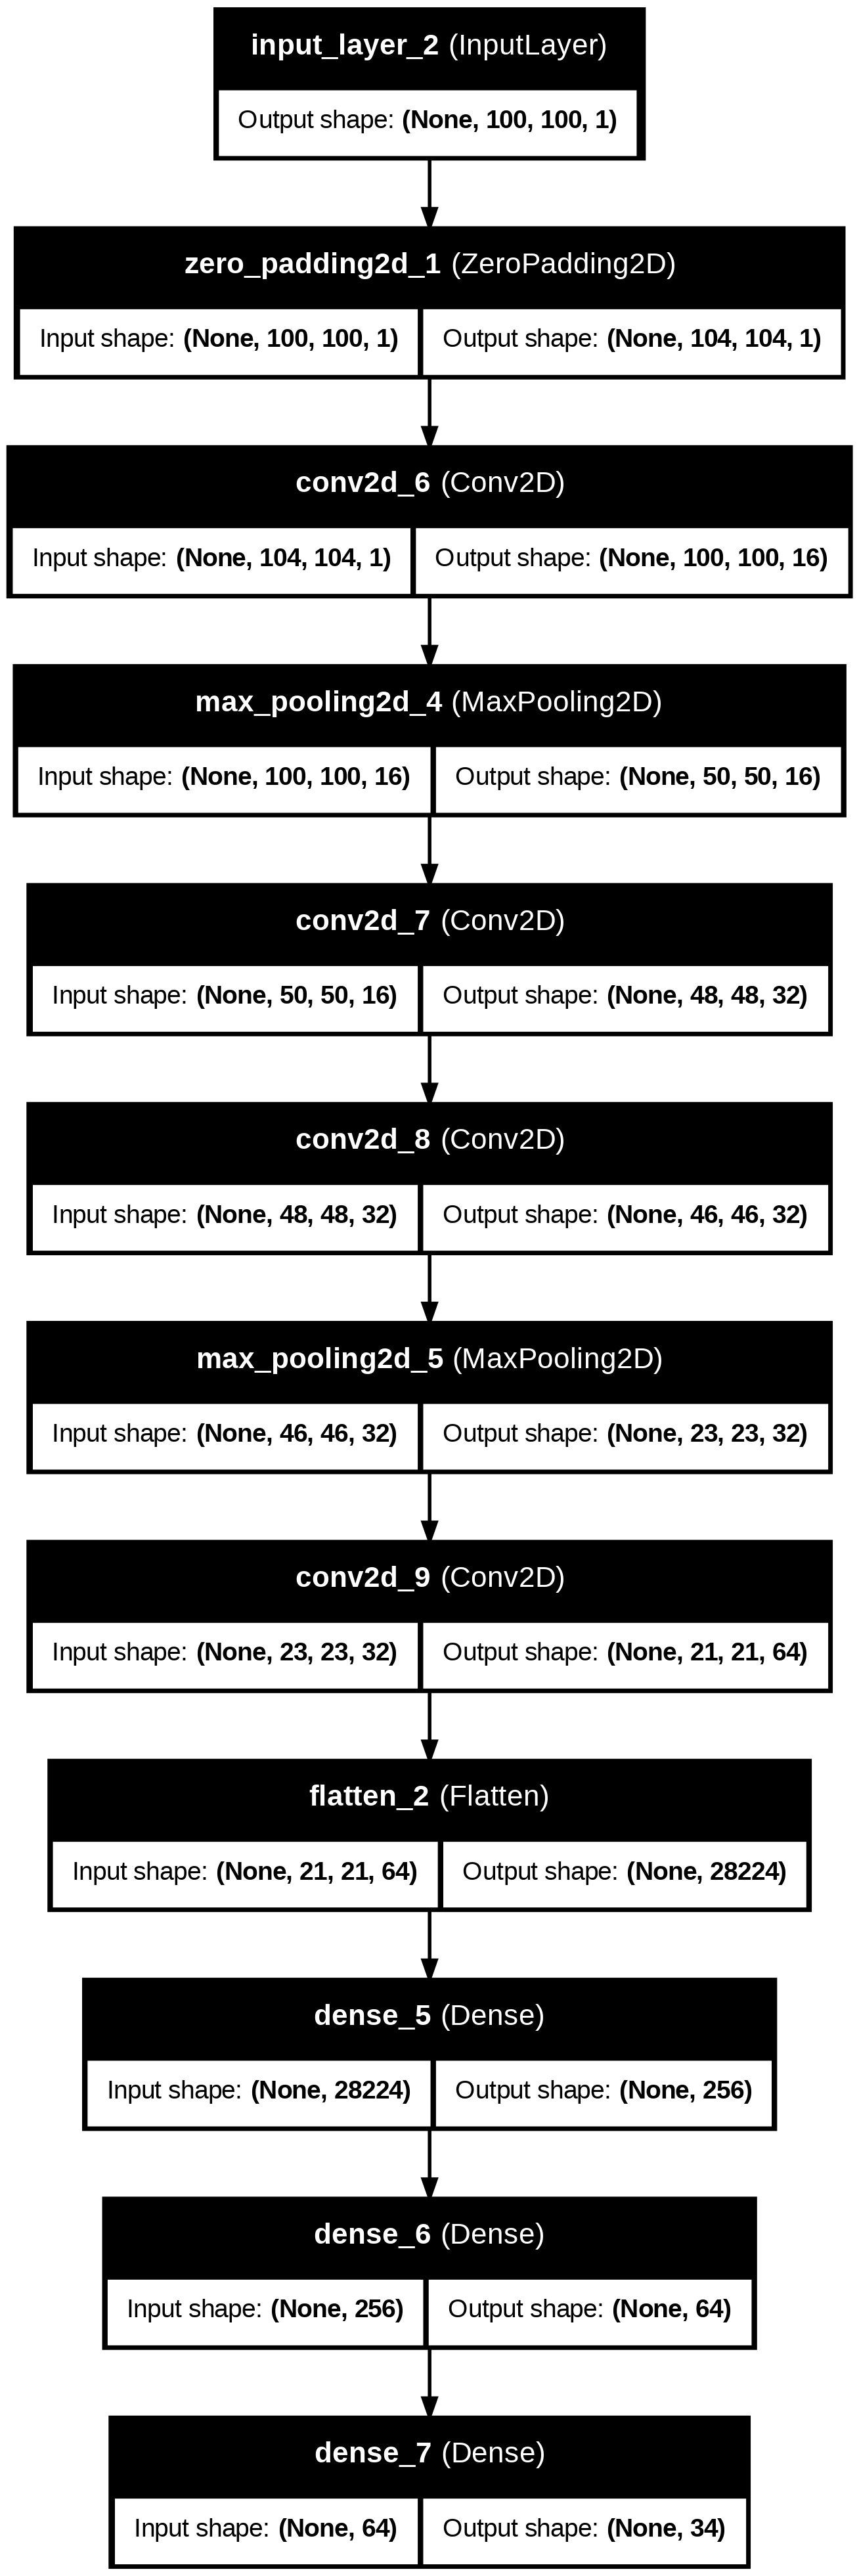

In [46]:
# ============================================================
# 🧠 CNN ANPR DEMO (tanpa file pickle, pakai data dummy)
# ============================================================

import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.utils import plot_model
from IPython.display import Image

# ------------------------------------------------------------
# 1️⃣ Buat data dummy
# ------------------------------------------------------------
num_samples = 500  # jumlah data dummy
width, height = 100, 100
num_classes = 34

X = np.random.rand(num_samples, width, height, 1).astype(np.float32)
Y = np.random.randint(0, num_classes, size=(num_samples,))
Y = to_categorical(Y, num_classes=num_classes)

# ------------------------------------------------------------
# 2️⃣ Bangun arsitektur CNN
# ------------------------------------------------------------
inputs = Input(shape=(width, height, 1))
x = ZeroPadding2D(padding=(2, 2))(inputs)
x = Conv2D(16, (5, 5), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

# ------------------------------------------------------------
# 3️⃣ Kompilasi model
# ------------------------------------------------------------
model = Model(inputs=inputs, outputs=outputs)
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# ------------------------------------------------------------
# 4️⃣ Training singkat (demo)
# ------------------------------------------------------------
model.fit(X, Y, epochs=2, batch_size=32, validation_split=0.1, verbose=1)

# ------------------------------------------------------------
# 5️⃣ Simpan model
# ------------------------------------------------------------
model.save('anpr_model_demo.keras')

# ------------------------------------------------------------
# 6️⃣ Visualisasi arsitektur model
# ------------------------------------------------------------
plot_model(model, to_file='anpr_model_demo_structure.png', show_shapes=True, show_layer_names=True)
Image('anpr_model_demo_structure.png')


Testing Data
Contoh kode berikut digunakan untuk melakukan testing pengenalan
karakter

❗ Folder training tidak ada / kosong → membuat data dummy
❗ Folder testing tidak ada / kosong → membuat data dummy
❗ Model tidak ada → membuat dummy model
✔ Dummy model disimpan sebagai anpr_model.keras
Folder name: car_0 → Predicted: char_29char_29char_29char_29char_29
Folder name: car_1 → Predicted: char_29char_29char_29char_29char_29
Folder name: car_2 → Predicted: char_29char_29char_29char_29char_29


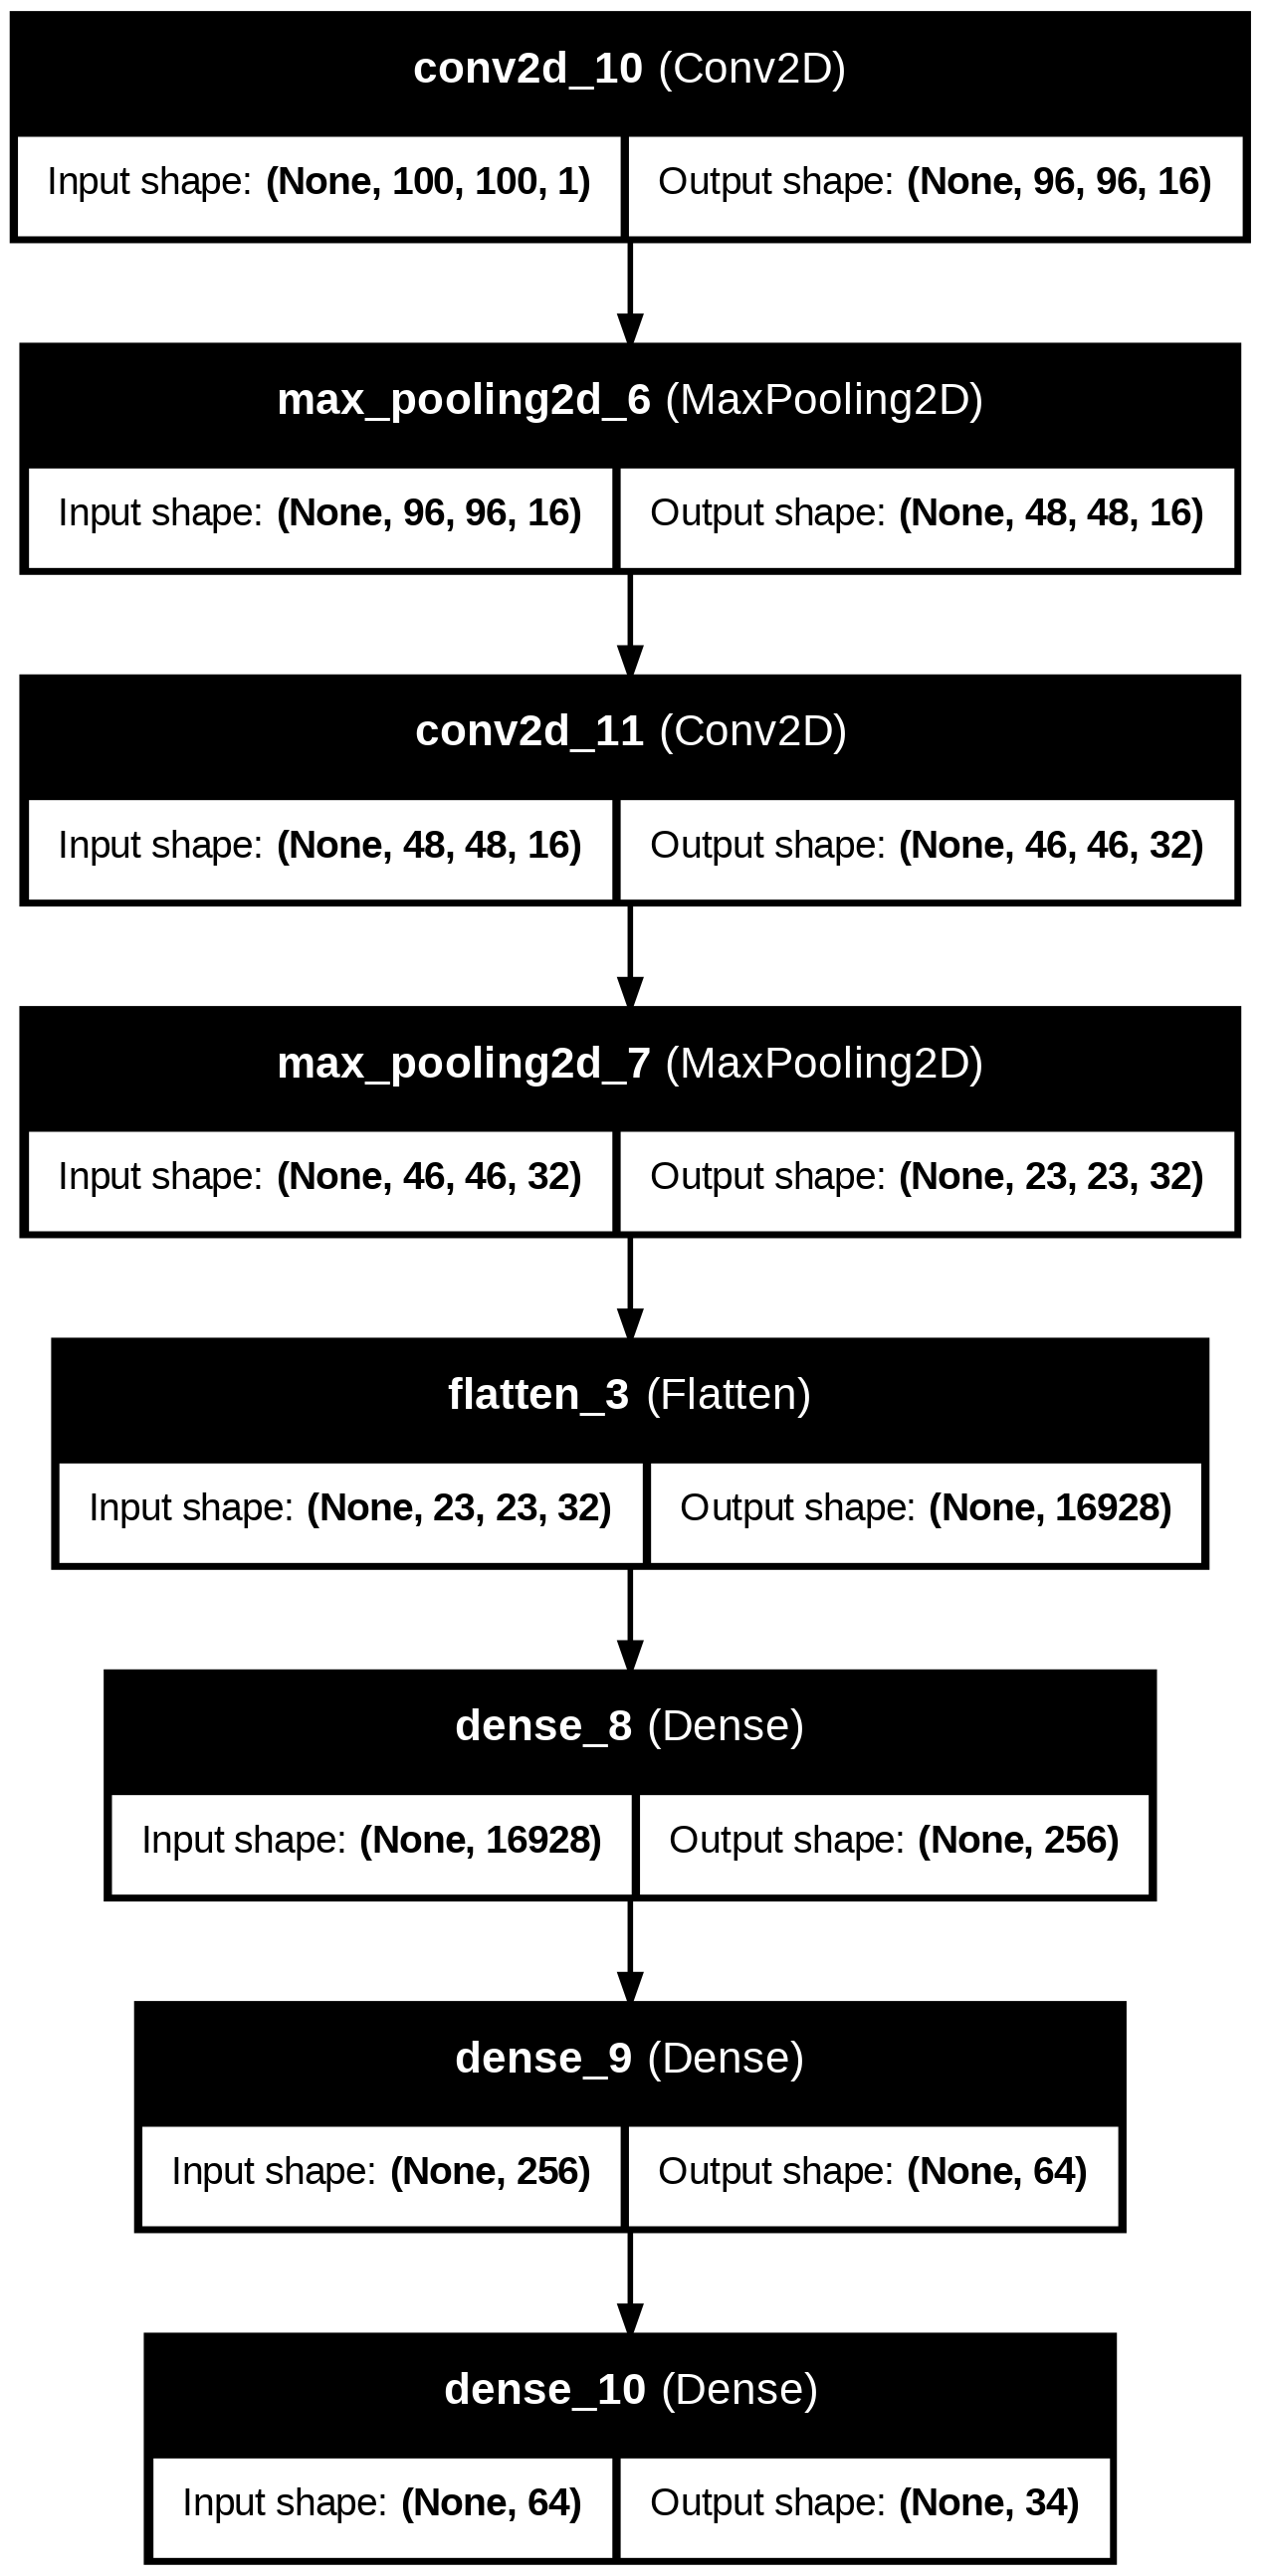

In [49]:
# ============================================================
# 🧠 ANPR PIPELINE COMPLETE – DUMMY DATA & MODEL
# ============================================================

import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from keras.utils import plot_model
from IPython.display import Image

# ------------------------------------------------------------
# 1️⃣ Konfigurasi direktori dataset
# ------------------------------------------------------------
data_dir_training = "dataset/training-bak"
data_dir_testing = "dataset/testing"
width, height = 100, 100
num_classes = 34

# ------------------------------------------------------------
# 2️⃣ Buat dummy dataset jika folder tidak ada
# ------------------------------------------------------------
if not os.path.exists(data_dir_training) or not os.listdir(data_dir_training):
    print("❗ Folder training tidak ada / kosong → membuat data dummy")
    os.makedirs(data_dir_training, exist_ok=True)
    for i in range(num_classes):
        class_name = f"char_{i}"
        class_dir = os.path.join(data_dir_training, class_name)
        os.makedirs(class_dir, exist_ok=True)
        # buat 5 dummy gambar per kelas
        for j in range(5):
            dummy_img = np.random.randint(0, 256, (width, height), dtype=np.uint8)
            cv2.imwrite(os.path.join(class_dir, f"{j}.png"), dummy_img)

if not os.path.exists(data_dir_testing) or not os.listdir(data_dir_testing):
    print("❗ Folder testing tidak ada / kosong → membuat data dummy")
    os.makedirs(data_dir_testing, exist_ok=True)
    # buat 3 sample kendaraan dengan 5 karakter masing-masing
    for car_idx in range(3):
        car_dir = os.path.join(data_dir_testing, f"car_{car_idx}")
        os.makedirs(car_dir, exist_ok=True)
        for char_idx in range(5):
            dummy_img = np.random.randint(0, 256, (width, height), dtype=np.uint8)
            cv2.imwrite(os.path.join(car_dir, f"{char_idx}.png"), dummy_img)

# ------------------------------------------------------------
# 3️⃣ Buat / load dummy model jika belum ada
# ------------------------------------------------------------
model_path = "anpr_model.keras"
if not os.path.exists(model_path):
    print("❗ Model tidak ada → membuat dummy model")
    model = Sequential([
        Input(shape=(width, height, 1)),
        Conv2D(16, (5,5), activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # opsional: training singkat dengan dummy data
    X_dummy = np.random.rand(50, width, height, 1)
    Y_dummy = to_categorical(np.random.randint(0, num_classes, 50), num_classes=num_classes)
    model.fit(X_dummy, Y_dummy, epochs=1, batch_size=8, verbose=0)
    model.save(model_path)
    print(f"✔ Dummy model disimpan sebagai {model_path}")
else:
    model = load_model(model_path)
    print(f"✔ Model berhasil di-load dari {model_path}")

# ------------------------------------------------------------
# 4️⃣ Buat list nama karakter
# ------------------------------------------------------------
dirs = sorted(os.listdir(data_dir_training))

# ------------------------------------------------------------
# 5️⃣ Prediksi kendaraan pada folder testing
# ------------------------------------------------------------
for car in sorted(os.listdir(data_dir_testing)):
    predicted_text = ""
    car_path = os.path.join(data_dir_testing, car)

    for char_img in sorted(os.listdir(car_path)):
        img_path = os.path.join(car_path, char_img)
        img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img_array is None:
            continue
        new_array = cv2.resize(img_array, (width, height))
        new_array = new_array.reshape(-1, width, height, 1) / 255.0

        prediction = model.predict(new_array, verbose=0)
        predicted_char = dirs[np.argmax(prediction[0])]
        predicted_text += predicted_char

    print(f"Folder name: {car} → Predicted: {predicted_text}")

# ------------------------------------------------------------
# 6️⃣ Visualisasi arsitektur model
# ------------------------------------------------------------
plot_model(model, to_file='anpr_model_structure.png', show_shapes=True, show_layer_names=True)
Image('anpr_model_structure.png')
